In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


**1. Data Cleaning:**

In [4]:
df = pd.read_csv('/Users/zentrovoy/Documents/BOOTCAMP/W8/D2(mini-Project)/Daily/globalterrorismdb_0718dist.csv', encoding='windows-1252', low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Name of Columns: {df.columns}")

Number of rows: 181691
Number of columns: 135
Name of Columns: Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [6]:
df.dtypes.value_counts()

object     58
float64    55
int64      22
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values.head(20)

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
claimmode3          181558
claimmode3_txt      181558
gsubname2           181531
claim3              181373
guncertain3         181371
gname3              181367
divert              181367
attacktype3         181263
attacktype3_txt     181263
ransomnote          181179
ransompaidus        181139
ransomamtus         181128
claimmode2          181075
claimmode2_txt      181075
ransompaid          180917
dtype: int64

In [9]:
# Percentage of missing values for each column
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.5].index # Select those that exceed 50%
print(f"Columns with more 50% of missing values: ({len(cols_to_drop)} columns) :\n")
print(cols_to_drop)

Columns with more 50% of missing values: (77 columns) :

Index(['approxdate', 'resolution', 'location', 'alternative',
       'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2',
       'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2',
       'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nh

In [10]:
df.drop(columns=cols_to_drop, inplace=True)


In [11]:
# Dataset updated
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}") # 135 - 77
print(f"Name of Columns: {df.columns}")

Number of rows: 181691
Number of columns: 58
Name of Columns: Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')


In [12]:
df.isnull().sum().sort_values(ascending=False)

nperps              71115
nperpcap            69489
nwoundte            69143
weapdetail          67670
nkillter            66958
scite1              66191
summary             66129
claimed             66120
nwoundus            64702
nkillus             64446
corp1               42552
weapsubtype1_txt    20768
weapsubtype1        20768
nwound              16311
targsubtype1        10373
targsubtype1_txt    10373
nkill               10313
longitude            4557
latitude             4556
natlty1_txt          1559
natlty1              1559
target1               638
city                  435
provstate             421
guncertain1           380
ishostkid             178
specificity             6
multiple                1
doubtterr               1
weaptype1_txt           0
weaptype1               0
INT_MISC                0
INT_IDEO                0
INT_LOG                 0
property                0
dbsource                0
eventid                 0
individual              0
crit1       

In [13]:
df.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
summary              object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
guncertain1         float64
individual          

In [12]:
# Columns with missing values

# ['provstate', 'city', 'latitude',
#        'longitude', 'specificity',  'summary', 'doubtterr', 'multiple',
#        'targtype1_txt', 'targsubtype1',
#        'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
#        'guncertain1', 'nperps', 'nperpcap', 'claimed',
#        'weapsubtype1', 'weapsubtype1_txt',
#        'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
#        'nwoundte', 'ishostkid', 'scite1']


In [14]:
# Numerical columns
numerical_cols = ['latitude', 'longitude', 'nkillus', 'nkillter', 'nwound',
                  'nwoundus', 'nwoundte', 'nkill', 'nperps', 'nperpcap'
]

# Fill with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [15]:
# Categorical columms (text / object)
text_cols = ['provstate', 'city', 'summary', 'target1',
                    'natlty1_txt', 'weapsubtype1_txt',
                    'weapdetail',  'scite1', 'corp1',
                    'targtype1_txt', 'targsubtype1_txt'
]


# Fill with "Unknown"
df[text_cols] = df[text_cols].fillna('Unknown')

In [16]:
# Categorical encoded as number
categorical_encoded_cols = ['natlty1', 'weapsubtype1', 'targsubtype1',
                            'specificity'
]

# Fill with mode
for col in categorical_encoded_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [17]:
# Binary columns
binary_cols = ['claimed', 'guncertain1', 'ishostkid', 'doubtterr',
               'multiple'
]

# Fill with 0
df[binary_cols] = df[binary_cols].fillna(0)

In [18]:
df.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
summary             0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
corp1               0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
nperps              0
nperpcap            0
claimed             0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
weapdetail          0
nkill               0
nkillus   

**2. Data Transformation:**


- Categorical Transformation:

In [19]:
for col in text_cols:
    print(f"{col}: {df[col].nunique()} unique values")

provstate: 2855 unique values
city: 36673 unique values
summary: 112493 unique values
target1: 86005 unique values
natlty1_txt: 216 unique values
weapsubtype1_txt: 31 unique values
weapdetail: 19149 unique values
scite1: 83989 unique values
corp1: 33237 unique values
targtype1_txt: 22 unique values
targsubtype1_txt: 113 unique values


In [20]:
# One-Hot Encoding
cols_for_one_hot = ['targtype1_txt', 'weapsubtype1_txt']
df = pd.get_dummies(df, columns=cols_for_one_hot, drop_first=True)

In [21]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_cols = ['city', 'provstate', 'corp1', 'target1']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


- Numerical Normalization:

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


**3. Exploratory Data Analysis:**

- **Data Exploration:** Conduct exploratory data analysis on the cleaned and integrated dataset.

In [23]:
print(f"Shape:{df.shape}") # Rows and columns
df.columns.tolist() # Names of columns

Shape:(181691, 107)


['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapdetail',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'scite1',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY',
 'targtype1_txt_Airports & Aircraft',
 'targtype1_txt_Business',
 'targtype1_txt_Educational Institution',
 'targtype1_txt_Food or Water Supply',
 'targtype1_txt_Government (Diplomatic)',
 'targtype1_txt_Government (General)',
 'targtype1_txt_Journalists & Media',
 '

In [24]:
# Global statistic view
df[numerical_cols].describe()

,latitude,longitude,nkillus,nkillter,nwound,nwoundus,nwoundte,nkill,nperps,nperpcap
count,1.816910e+05,1.816910e+05,1.816910e+05,1.816910e+05,1.816910e+05,1.816910e+05,1.816910e+05,1.816910e+05,1.816910e+05,1.816910e+05
mean,-3.528252e-16,2.199780e-19,1.153663e-18,1.251431e-18,3.363220e-18,4.155141e-18,-8.603585e-18,1.759824e-17,1.314002e-17,-2.150896e-19
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-4.181967e+00,-4.262511e+02,-6.500731e-03,-9.586981e-02,-8.403747e-02,-1.022085e-02,-5.659290e-02,-2.019110e-01,-1.206240e-01,-9.700072e+00
25%,-6.447425e-01,2.239242e-03,-6.500731e-03,-9.586981e-02,-8.403747e-02,-1.022085e-02,-5.659290e-02,-2.019110e-01,-1.206240e-01,9.271111e-02
50%,4.227682e-01,2.420214e-03,-6.500731e-03,-9.586981e-02,-8.403747e-02,-1.022085e-02,-5.659290e-02,-2.019110e-01,-1.206240e-01,9.271111e-02
75%,5.898829e-01,2.544406e-03,-6.500731e-03,-9.586981e-02,-2.574484e-02,-1.022085e-02,-5.659290e-02,-2.376940e-02,-1.206240e-01,9.271111e-02
max,2.771664e+00,3.093429e-03,2.979584e+02,1.493155e+02,2.386534e+02,3.060992e+02,1.704503e+02,1.396392e+02,1.477636e+02,4.025301e+01


In [25]:
# Attacks per year
attacks_per_year = df['iyear'].value_counts().sort_index()
attacks_per_year

iyear
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: count, dtype: int64

*Geographic distribution*

In [26]:
print(df['country_txt'].nunique())
df['country_txt'].value_counts().head(20)

205


country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: count, dtype: int64

In [ ]:
print(df['region_txt'].nunique())
df['region_txt'].value_counts()

12


region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64

*Attack types*

In [28]:
# What is most frequent
print(df['attacktype1_txt'].nunique())
attacks_type = df['attacktype1_txt'].value_counts()
attacks_type

9


attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

In [29]:
# most active Terrorist groups
print(df['gname'].nunique())
df['gname'].value_counts().head(10)


3537


gname
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: count, dtype: int64

*Targets and weapons*

In [30]:
# Targets
target_type_counts = df.filter(like='targtype1_txt_').sum().sort_values(ascending=False)
target_type_counts

targtype1_txt_Private Citizens & Property       43511
targtype1_txt_Military                          27984
targtype1_txt_Police                            24506
targtype1_txt_Government (General)              21283
targtype1_txt_Business                          20669
targtype1_txt_Transportation                     6799
targtype1_txt_Utilities                          6023
targtype1_txt_Unknown                            5898
targtype1_txt_Religious Figures/Institutions     4440
targtype1_txt_Educational Institution            4322
targtype1_txt_Government (Diplomatic)            3573
targtype1_txt_Terrorists/Non-State Militia       3039
targtype1_txt_Journalists & Media                2948
targtype1_txt_Violent Political Party            1866
targtype1_txt_Airports & Aircraft                1343
targtype1_txt_Telecommunication                  1009
targtype1_txt_NGO                                 970
targtype1_txt_Tourists                            440
targtype1_txt_Maritime      

In [31]:
df['targsubtype1_txt'].value_counts().head(35).sort_values(ascending=False)

targsubtype1_txt
Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Unknown                                                    10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Police Patrol (including vehicles and convoys)              5105
Government Building/Facility/Office                         4802
Retail/Grocery/Bakery                                       4274
Electricity                                                 4198
Bank/Commerce                                               3242
House/Ap

In [32]:
# Weapons
df['weaptype1_txt'].value_counts()

weaptype1_txt
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                       

*Deadliest attacks*

In [33]:
df[['iyear', 'country_txt', 'nkill', 'summary']].sort_values(by='nkill', ascending=False).head(10)


,iyear,country_txt,nkill,summary
133518,2014,Iraq,139.639217,06/12/2014: Assailants abducted approximately ...
73126,2001,United States,123.072051,09/11/2001: This was one of four related attac...
73127,2001,United States,122.982980,09/11/2001: This was one of four related attac...
55934,1994,Rwanda,104.901612,Unknown
136283,2014,Iraq,84.682544,08/03/2014: Assailants attacked Yizidi civilia...
133225,2014,Iraq,59.475513,06/10/2014: Assailants stormed Badush prison i...
179671,2017,Somalia,52.171709,10/14/2017: A suicide bomber detonated an expl...
76347,2004,Nepal,45.936754,03/21/2004: Nepalese Communist Party (Maoist) ...
136746,2014,Syria,45.847683,08/19/2014: Assailants attacked Tabqa Air Base...
170198,2016,Syria,38.365738,"12/10/2016: Assailants, including suicide bomb..."


- **Visualization:** Create visualizations to reveal patterns and insights related to terrorism events in their socio-economic context.


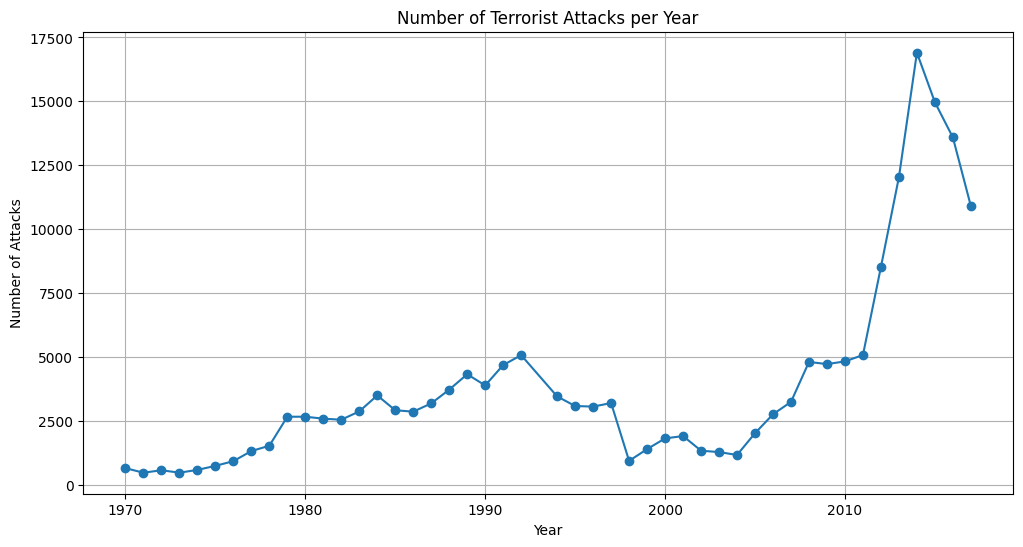

In [34]:
# Attacks per year
plt.figure(figsize=(12,6))
attacks_per_year.plot(kind='line', marker='o')
plt.title('Number of Terrorist Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

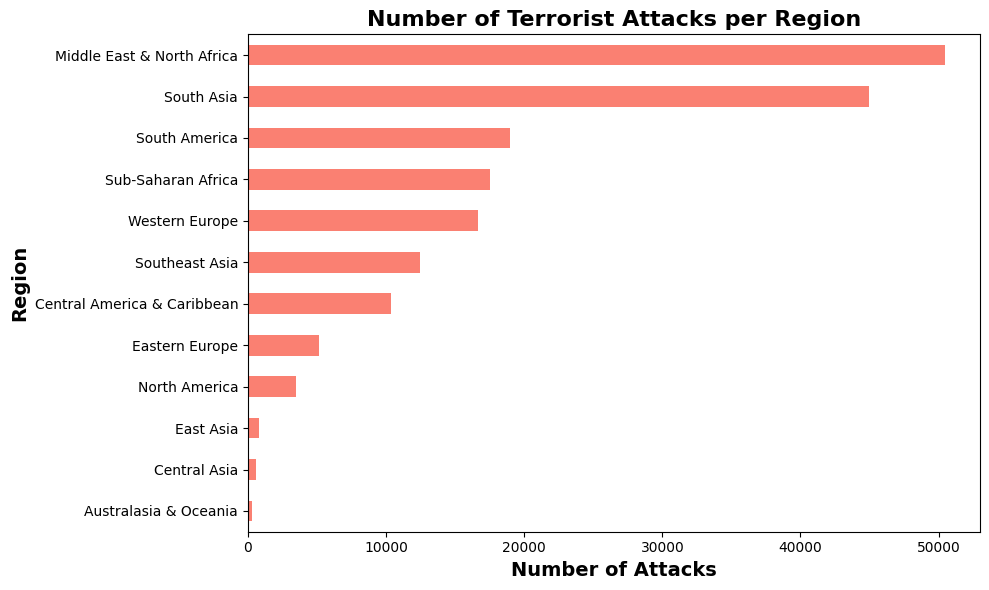

In [35]:
# Attack per region
df['region_txt'].value_counts().sort_values().plot(
    kind='barh', figsize=(10,6), color='salmon'
)
plt.title("Number of Terrorist Attacks per Region", fontsize=16, fontweight='bold')
plt.xlabel("Number of Attacks", fontsize=14, fontweight='bold')
plt.ylabel("Region", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

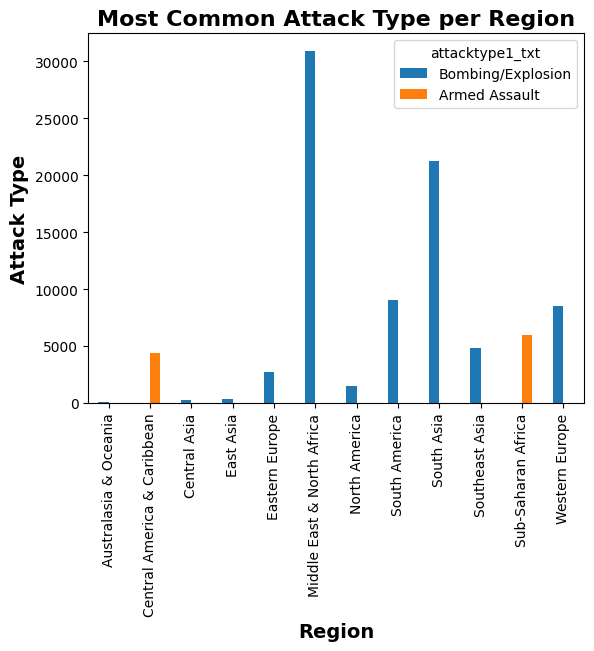

In [36]:
# Most common attack type per region
plt.figure(figsize=(12,6))
df.groupby('region_txt')['attacktype1_txt'].value_counts().groupby(level=0).head(1).unstack().plot(kind='bar')
plt.title("Most Common Attack Type per Region", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=14, fontweight='bold')
plt.ylabel("Attack Type", fontsize=14, fontweight='bold')
plt.show()

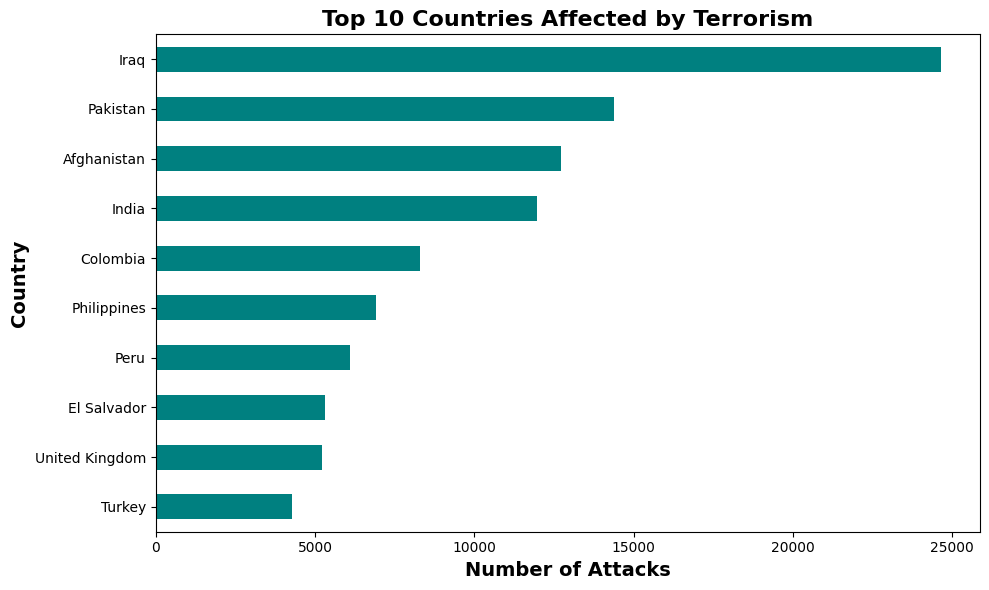

In [37]:
# Top 10 most affected countries
df['country_txt'].value_counts().head(10).sort_values().plot(
    kind='barh', figsize=(10,6), color='teal'
)
plt.title("Top 10 Countries Affected by Terrorism", fontsize=16, fontweight='bold')
plt.xlabel("Number of Attacks", fontsize=14, fontweight='bold')
plt.ylabel("Country", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


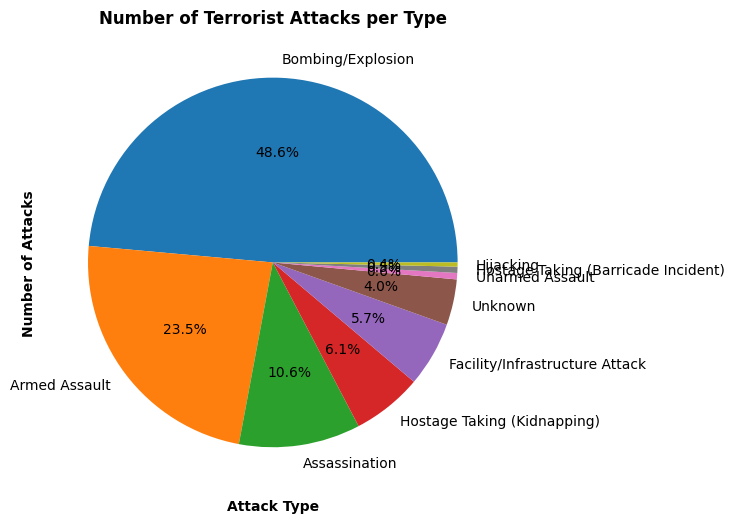

In [38]:
# Attacks type
plt.figure(figsize=(12,6))

attacks_type.plot(kind='pie', autopct='%1.1f%%')
plt.title('Number of Terrorist Attacks per Type', fontweight = 'bold')
plt.xlabel('Attack Type', fontweight = 'bold')
plt.ylabel('Number of Attacks', fontweight = 'bold')
plt.grid(True)

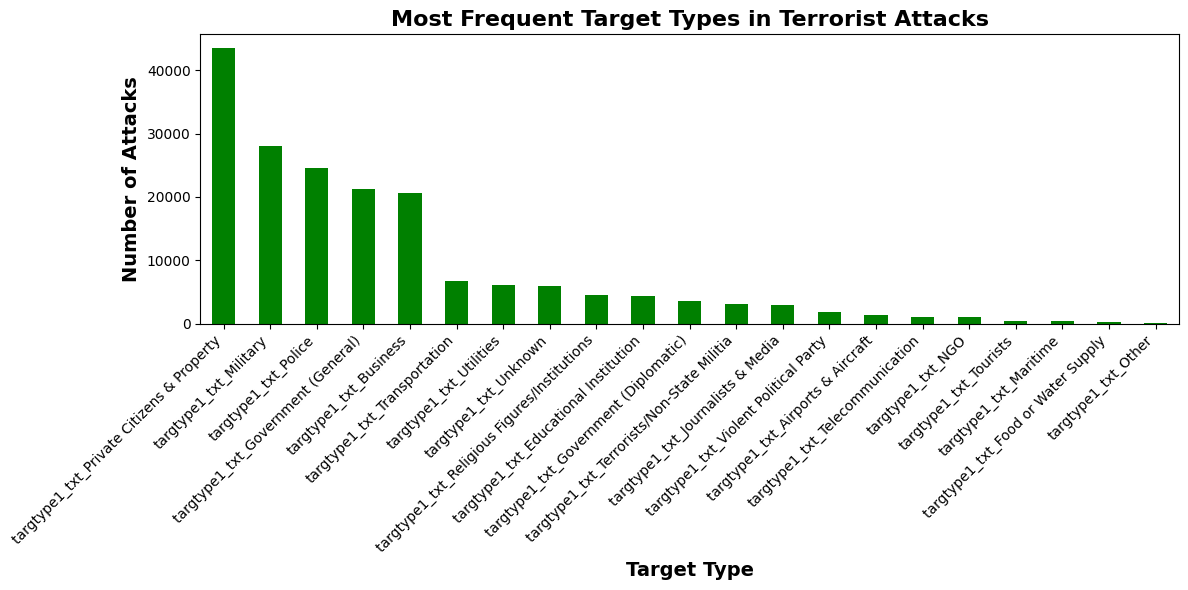

In [39]:
# Target type
plt.figure(figsize=(12,6))
target_type_counts.plot(kind='bar', color='green')
plt.title("Most Frequent Target Types in Terrorist Attacks", fontsize=16, fontweight='bold')
plt.xlabel("Target Type", fontsize=14, fontweight='bold')
plt.ylabel("Number of Attacks", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


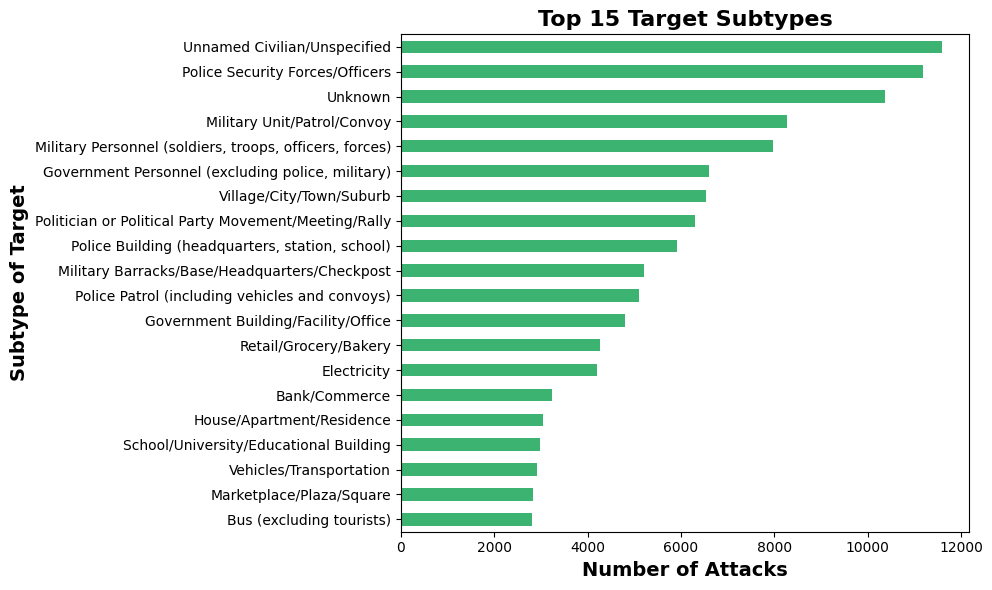

In [40]:
# Sub Target Type
df['targsubtype1_txt'].value_counts().head(20).sort_values().plot(
    kind='barh', figsize=(10,6), color='mediumseagreen'
)
plt.title("Top 15 Target Subtypes", fontsize=16, fontweight='bold')
plt.xlabel("Number of Attacks", fontsize=14, fontweight='bold')
plt.ylabel("Subtype of Target", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [41]:
# Number of attacks targeting religious targets
religious_attacks = df['targtype1_txt_Religious Figures/Institutions'].sum()

# Total attacks
target_type_counts = df.filter(like='targtype1_txt_').sum().sum()

# Proportion %
proportion = (religious_attacks / target_type_counts) * 100

print(f"Religious targets represent {religious_attacks} attacks, which is {proportion:.2f}% of all known target types.")

Religious targets represent 4440 attacks, which is 2.45% of all known target types.


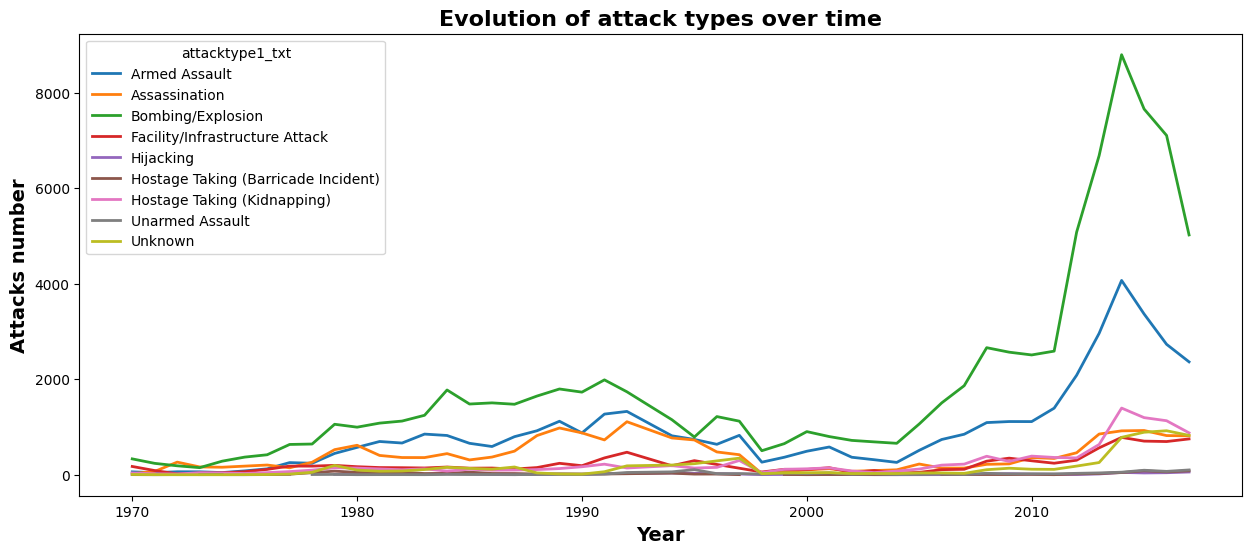

In [42]:
# Evolution of attack types over time

df.groupby(['iyear', 'attacktype1_txt']).size().unstack().plot(
    figsize=(15, 6), linewidth=2
)
plt.title("Evolution of attack types over time", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Attacks number", fontsize=14, fontweight='bold')
plt.show()

In [45]:
# Most active Terrorist group per country
df[df['gname'] != 'Unknown'].groupby('country_txt')['gname'].agg(lambda x: x.value_counts().index[0]).head(10)


country_txt
Afghanistan                                              Taliban
Albania                                        Muslim extremists
Algeria                              Algerian Islamic Extremists
Andorra          International Revolutionary Action Group (GARI)
Angola         National Union for the Total Independence of A...
Argentina                                 Montoneros (Argentina)
Armenia                                      Armenian Guerrillas
Australia                             Jihadi-inspired extremists
Austria                                      Neo-Nazi extremists
Azerbaijan                                 Azerbaijan Guerrillas
Name: gname, dtype: object

In [58]:

df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# World Map
df_map = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]

# Top 10 most affected countries
top_countries = df_map['country_txt'].value_counts().head(10).index.tolist()

# Sample up to 100 attacks per country
df_map_sample = df_map.sample(n=1000, random_state=42)

# Sample on 100 attacks by country
df_sampled = df_map[df_map['country_txt'].isin(top_countries)].\
groupby('country_txt').apply(lambda x: x.sample(min(100, len(x)), random_state=42)).reset_index(drop=True)

# Create the Map
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Add markers with popups
for _, row in df_sampled.iterrows():
    lat, lon = float(row['latitude']), float(row['longitude'])  # ← force conversion
    popup_text = f"""
    Country: {row['country_txt']}
    City: {row['city']}
    Year: {row['iyear']}
    Attack Type: {row['attacktype1_txt']}
    Killed: {row['nkill']}
    """
    folium.CircleMarker(
        location=[lat, lon],
        radius=3,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(world_map)

world_map

/var/folders/9r/c_3br2313gl1bvhfwpc6q15r0000gn/T/ipykernel_64681/246453634.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  groupby('country_txt').apply(lambda x: x.sample(min(100, len(x)), random_state=42)).reset_index(drop=True)


**Conclusion and Insights**
- The dataset contains **181,691 records across 135 columns**, spanning terrorism events worldwide from 1970 to 2017.
- Many columns had over 50% missing values. These were dropped to retain only the most informative features.

- **Visualizations**
 - Terrorist attacks have **increased** significantly over the decades, peaking in the early 2010s. This **rise in attacks** from 2003–2014 aligns with major geopolitical conflicts
 - The most affected countries include **Iraq, Pakistan, India, Afghanistan, and Colombia**.
 - The most common type of attack is **bombing/explosion**, followed by **armed assault** and **assassination**.
 - The most targeted groups are **private citizens & property, military, and police**, which raises concerns about the socio-psychological impact of terrorism.
 - Groups like **Taliban, ISIL, and Boko Haram** are among the most active globally.
 - Different regions have different dominant tactics (e.g. car bombs in Iraq, armed assault in Africa).
 - The variety in target subtypes can reflect underlying **social, political, or religious tensions.**